In [1]:
import numpy as np
import brian2 as br
import matplotlib.pyplot as plt
from time import time
from Reservoir.reservoir import Reservoir

In [12]:
res = Reservoir(n_neurons_side=3)
res.init_connection_matrix()

In [45]:
dyn_eqs = """
dv/dt = (0.04*v**2 + 5*v + 140 - u + I +j)/t2 : 1
du/dt = a*(b*v-u)/t2 : 1
dj/dt = j/tau : 1
I = 0 : 1
a : 1
b : 1
d : 1
p : 1
t2 : second
tau : second
"""
reset_eqs = """
v = -65
u = u + d
"""


In [46]:
neuron_group = br.NeuronGroup(res.n_neurons_side**3, dyn_eqs, threshold='v>30', reset=reset_eqs)
neuron_group.a = [0.02 if n=='ex' else 0.1 for n in res.types]
neuron_group.b = [0.2 for n in res.types]
neuron_group.d = [8 if n=='ex' else 2 for n in res.types]
neuron_group.tau = [3*br.ms if n=='ex' else 6*br.ms for n in res.types]
neuron_group.t2 = [1*br.units.second for n in res.types]
neuron_group.p = [0.25 if n=='ex' else -0.5 for n in res.types]

S = br.Synapses(neuron_group, neuron_group, on_pre='j_post += p_pre')
sources, targets = res.M.nonzero()
S.connect(i=sources, j=targets)


In [47]:
M = br.SpikeMonitor(neuron_group)
state_m = br.StateMonitor(neuron_group, ['v', 'u'], record=True)
br.run(200*br.ms)

INFO       No numerical integration method specified for group 'neurongroup_1', using method 'euler' (took 0.01s, trying other methods took 0.02s). [brian2.stateupdaters.base.method_choice]


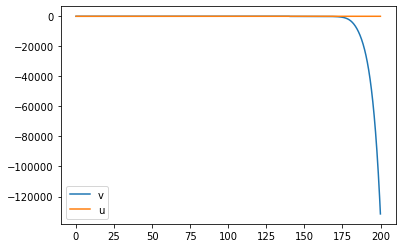

In [62]:
#plt.plot(M.t/br.ms, M.i, '.k')
plt.plot(state_m.t/br.ms, state_m.v[8])
plt.plot(state_m.t/br.ms, state_m.u[3])
plt.legend(['v', 'u'])

In [53]:
res.types[3]

'inh'

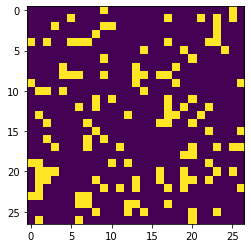

In [27]:
plt.imshow(res.M)